In [1]:
%matplotlib inline

import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as ml
import pandas
import random
import seaborn

matplotlib.rcParams['axes.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
seaborn.set_context({"figure.figsize": (12, 8)})

In [2]:
def calc_rho(species, basedir='species'):
    files = ['{}/{}/{}.iloci.tsv'.format(basedir, s, s) for s in species]
    data = pandas.concat([pandas.read_table(f) for f in files])
    giloci = data.loc[data.LocusClass.isin(['siLocus', 'ciLocus', 'niLocus'])]
    iiloci = data.loc[data.LocusClass.isin(['iiLocus'])]
    quant = list(giloci['Length'].quantile([0.01, 0.5, 0.95]))
    giloci_q = giloci.loc[(giloci.Length >= quant[0]) & (giloci.Length <= quant[2])]
    quant = list(iiloci['Length'].quantile([0.01, 0.5, 0.95]))
    iiloci_q = iiloci.loc[(iiloci.Length >= quant[0]) & (iiloci.Length <= quant[2])]
    rho = iiloci_q['Length'].mean() / giloci_q['Length'].mean()
    return rho

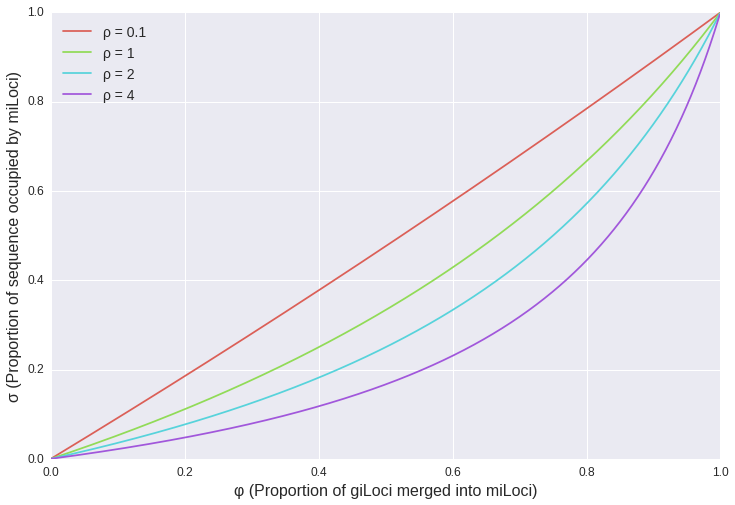

In [3]:
x = [i / 1000 for i in range(1000)]
colors = seaborn.color_palette("hls", 4)
plots = list()
rhos = [0.1, 1, 2, 4]
labels = ['ρ = {}'.format(num) for num in rhos]
for j, rho in enumerate(rhos):
    y = [(i/(1+(1-i)*rho)) for i in x]
    theplot = ml.Line2D(x, y, color=colors[j], label=labels[j])
    _ = plt.plot(x, y, color=colors[j], label=labels[j])
    plots.append(theplot)
plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, labels,
               loc='upper left', ncol=1, fontsize=14)
plt.show()

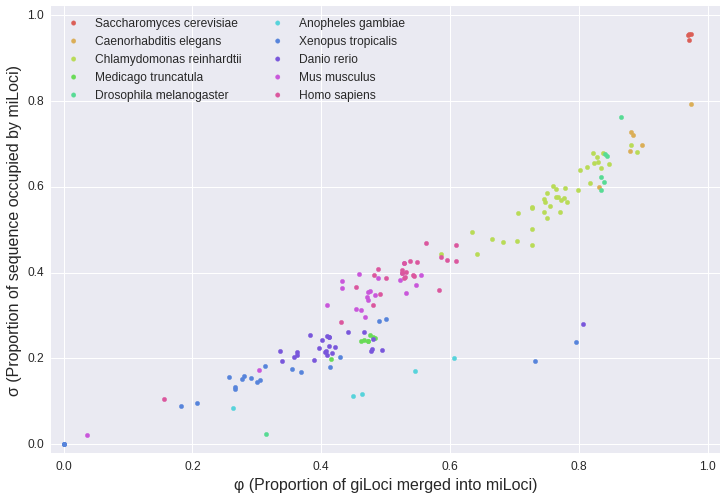

In [4]:
data = pandas.read_table('phisigma-modorg.tsv')
speciesnames = ['Saccharomyces cerevisiae', 'Caenorhabditis elegans',
                'Chlamydomonas reinhardtii', 'Medicago truncatula',
                'Drosophila melanogaster', 'Anopheles gambiae',
                'Xenopus tropicalis', 'Danio rerio',
                'Mus musculus', 'Homo sapiens']
specieslist = ['Scer', 'Cele', 'Crei', 'Mtru', 'Dmel',
               'Agam', 'Xtro', 'Drer', 'Mmus', 'Hsap']

plots = list()
palette = seaborn.color_palette("hls", len(specieslist))
for i, species in enumerate(specieslist):
    # Uncomment and edit the next two lines if you want to exclude/restrict the plot
    # if species in ['Vcar']:
    #    continue
    specdata = data.loc[(data.Species == species)]
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i])
    plots.append(plot)
_ = plt.xlim(-0.02, 1.02)
_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
_ = plt.show()

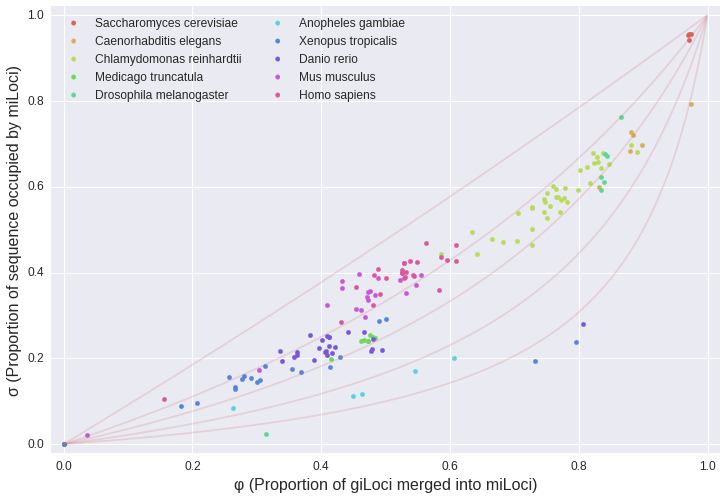

In [5]:
data = pandas.read_table('phisigma-modorg.tsv')
speciesnames = ['Saccharomyces cerevisiae', 'Caenorhabditis elegans',
                'Chlamydomonas reinhardtii', 'Medicago truncatula',
                'Drosophila melanogaster', 'Anopheles gambiae',
                'Xenopus tropicalis', 'Danio rerio',
                'Mus musculus', 'Homo sapiens']
specieslist = ['Scer', 'Cele', 'Crei', 'Mtru', 'Dmel',
               'Agam', 'Xtro', 'Drer', 'Mmus', 'Hsap']

#colors = seaborn.dark_palette("grey", 5)
rhos = [0.1, 1, 2, 4, 8]
for j, rho in enumerate(rhos):
    y = [(i/(1+(1-i)*rho)) for i in x]
    _ = plt.plot(x, y, color='#cc6666', alpha=0.2)

plots = list()
palette = seaborn.color_palette("hls", len(specieslist))
for i, species in enumerate(specieslist):
    specdata = data.loc[(data.Species == species)]
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i])
    plots.append(plot)

_ = plt.xlim(-0.02, 1.02)
_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
_ = plt.show()

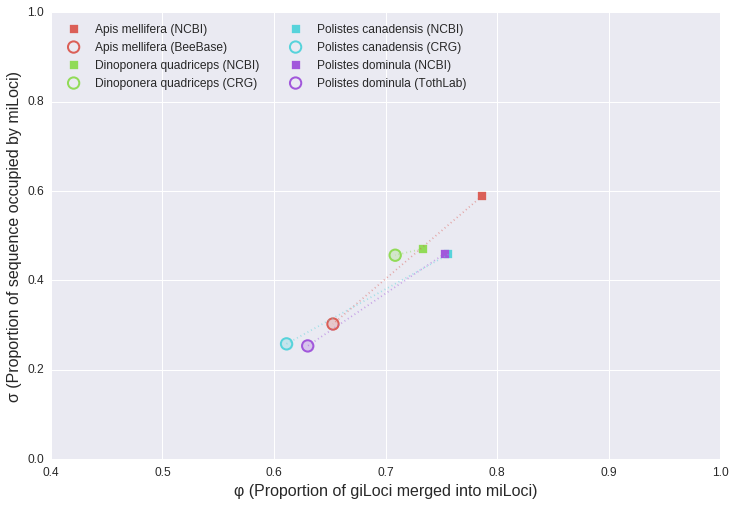

In [6]:
data = pandas.read_table('phisigma-alternates-centroids.tsv')
speciesnames = ['Apis mellifera (NCBI)', 'Apis mellifera (BeeBase)',
                'Dinoponera quadriceps (NCBI)', 'Dinoponera quadriceps (CRG)',
                'Polistes canadensis (NCBI)', 'Polistes canadensis (CRG)',
                'Polistes dominula (NCBI)', 'Polistes dominula (TothLab)']
specieslist = ['Amel', 'Am32', 'Dqua', 'Dqcr',
               'Pcan', 'Pccr', 'Pdom', 'Pdtl']

plots = list()
palette = seaborn.color_palette("hls", len(specieslist))
for i, species in enumerate(specieslist):
    if i % 2 == 1:
        continue

    phis = list()
    sigmas = list()
        
    specdata = data.loc[(data.Species == species)]
    phis.append(list(specdata['Phi'])[0])
    sigmas.append(list(specdata['Sigma'])[0])
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i], marker='s', s=64)
    plots.append(plot)

    specdata = data.loc[(data.Species == specieslist[i+1])]
    phis.append(list(specdata['Phi'])[0])
    sigmas.append(list(specdata['Sigma'])[0])
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i], s=128, alpha=0.25)
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i], s=128, facecolor='none', lw='2')
    plots.append(plot)
    plot = plt.plot(phis, sigmas, color=palette[i], alpha=0.5, ls=':')
    

_ = plt.xlim(0.4, 1.0)
_ = plt.ylim(0.0, 1.0)
#_ = plt.xlim(0.59, 0.81)
#_ = plt.ylim(0.18, 0.82)
#_ = plt.xlim(-0.02, 1.02)
#_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
_ = plt.show()

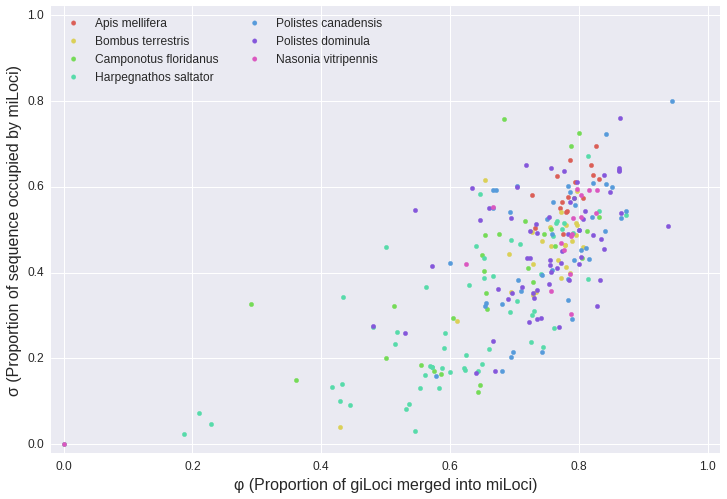

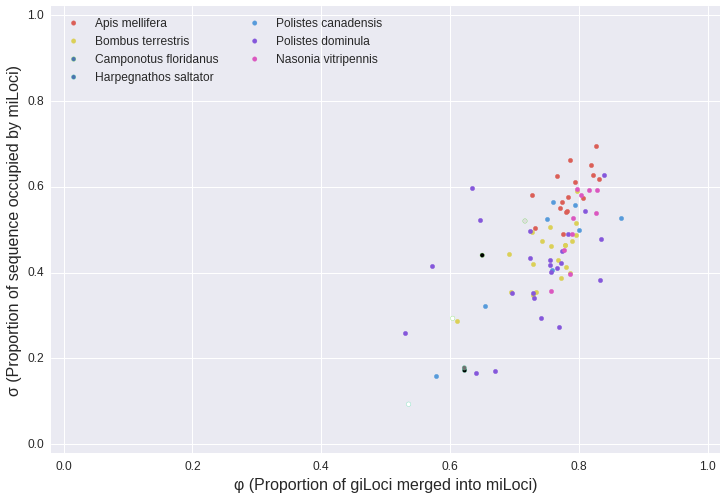

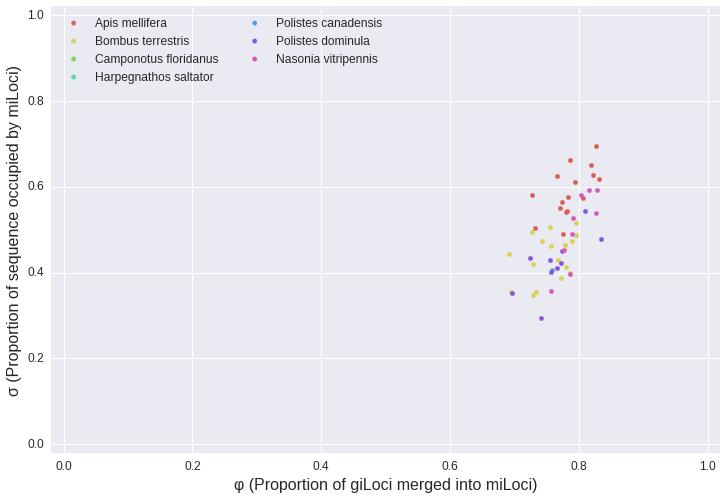

In [7]:
speciesnames = ['Apis mellifera', 'Bombus terrestris',
                'Camponotus floridanus', 'Harpegnathos saltator',
                'Polistes canadensis', 'Polistes dominula',
                'Nasonia vitripennis']
specieslist = ['Amel', 'Bter', 'Cflo', 'Hsal', 'Pcan', 'Pdom', 'Nvit']
palette = seaborn.color_palette("hls", len(specieslist))

for filename in ['phisigma-pdom-min1Mb.tsv', 'phisigma-pdom-min2Mb.tsv', 'phisigma-pdom-min3Mb.tsv']:
    data = pandas.read_table(filename)
    plots = list()
    for i, species in enumerate(specieslist):
        # Uncomment and edit the next two lines if you want to exclude/restrict the plot
        # if species in ['Vcar']:
        #    continue
        specdata = data.loc[(data.Species == species)]
        plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i])
        plots.append(plot)
    _ = plt.xlim(-0.02, 1.02)
    _ = plt.ylim(-0.02, 1.02)
    _ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
    _ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
    _ = plt.legend(plots, speciesnames, scatterpoints=1,
               loc='upper left',
               ncol=2,
               fontsize=12)
    _ = plt.show()

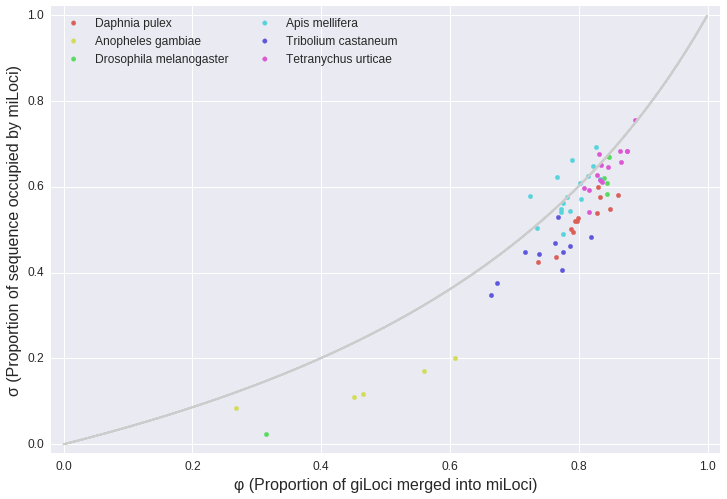

In [8]:
speciesnames = ['Daphnia pulex', 'Anopheles gambiae', 'Drosophila melanogaster',
                'Apis mellifera', 'Tribolium castaneum', 'Tetranychus urticae', ]
specieslist = ['Dpul', 'Agam', 'Dmel', 'Amel', 'Tcas', 'Turt']
palette = seaborn.color_palette("hls", len(specieslist))
rho = calc_rho(specieslist, basedir='../genome-summary/species')

data = pandas.read_table('phisigma-dpul.tsv')
plots = list()
for i, species in enumerate(specieslist):
    # Uncomment and edit the next two lines if you want to exclude/restrict the plot
    # if species in ['Vcar']:
    #    continue
    specdata = data.loc[(data.Species == species)]
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i])
    plots.append(plot)
    x = [k / 1000 for k in range(1000)]
    y = [(k/(1+(1-k)*rho)) for k in x]
    _ = plt.plot(x, y, color='#cccccc')
_ = plt.xlim(-0.02, 1.02)
_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
_ = plt.show()

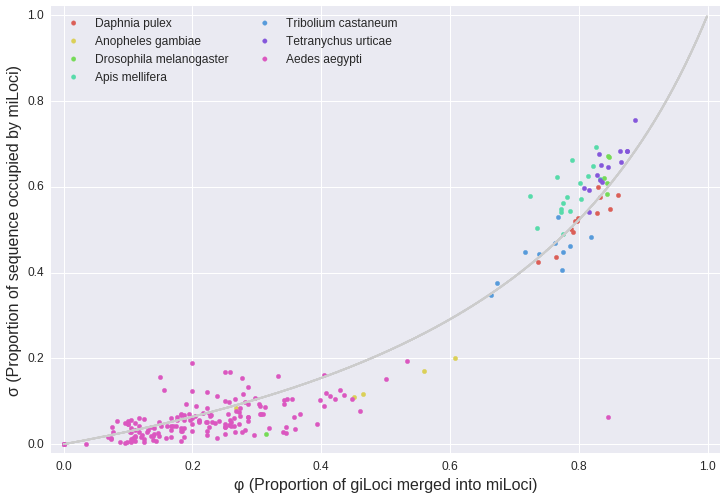

In [9]:
speciesnames = ['Daphnia pulex', 'Anopheles gambiae', 'Drosophila melanogaster',
                'Apis mellifera', 'Tribolium castaneum', 'Tetranychus urticae',
                'Aedes aegypti']
specieslist = ['Dpul', 'Agam', 'Dmel', 'Amel', 'Tcas', 'Turt', 'Aaeg']
palette = seaborn.color_palette("hls", len(specieslist))
rho = calc_rho(specieslist, basedir='../genome-summary/species')

data = pandas.read_table('phisigma-aaeg.tsv')
plots = list()
for i, species in enumerate(specieslist):
    # Uncomment and edit the next two lines if you want to exclude/restrict the plot
    # if species in ['Vcar']:
    #    continue
    specdata = data.loc[(data.Species == species)]
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i])
    plots.append(plot)
    x = [k / 1000 for k in range(1000)]
    y = [(k/(1+(1-k)*rho)) for k in x]
    _ = plt.plot(x, y, color='#cccccc')
_ = plt.xlim(-0.02, 1.02)
_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
_ = plt.show()

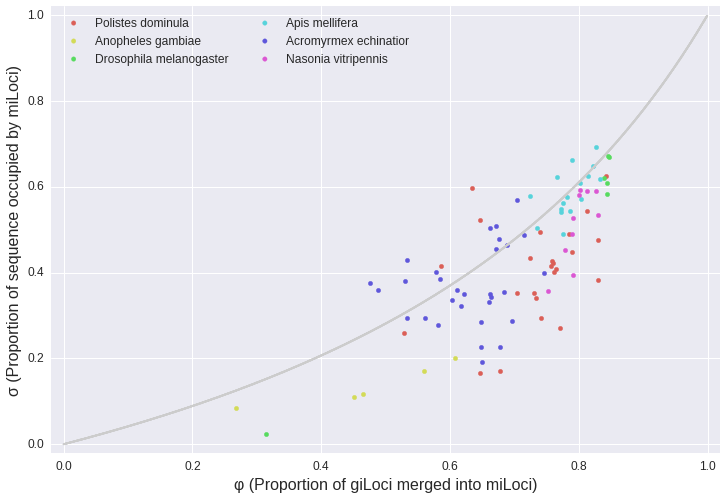

In [10]:
speciesnames = ['Polistes dominula', 'Anopheles gambiae', 'Drosophila melanogaster',
                'Apis mellifera', 'Acromyrmex echinatior', 'Nasonia vitripennis']
specieslist = ['Pdom', 'Agam', 'Dmel', 'Amel', 'Aech', 'Nvit']
palette = seaborn.color_palette("hls", 6)
rho = calc_rho(specieslist, basedir='../genome-summary/species')

data = pandas.read_table('phisigma-pdom.tsv')
plots = list()
for i, species in enumerate(specieslist):
    # Uncomment and edit the next two lines if you want to exclude/restrict the plot
    # if species in ['Vcar']:
    #    continue
    specdata = data.loc[(data.Species == species)]
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i])
    plots.append(plot)
    x = [k / 1000 for k in range(1000)]
    y = [(k/(1+(1-k)*rho)) for k in x]
    _ = plt.plot(x, y, color='#cccccc')
_ = plt.xlim(-0.02, 1.02)
_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
_ = plt.show()

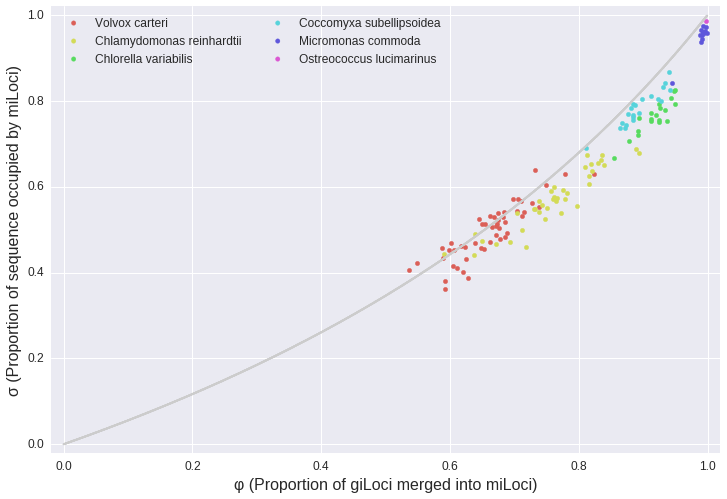

In [11]:
speciesnames = ['Volvox carteri', 'Chlamydomonas reinhardtii',
                'Chlorella variabilis', 'Coccomyxa subellipsoidea', 'Micromonas commoda',
                'Ostreococcus lucimarinus']
specieslist = ['Vcar', 'Crei', 'Cvar', 'Csub', 'Mcom', 'Oluc']
palette = seaborn.color_palette("hls", len(speciesnames))
rho = calc_rho(specieslist, basedir='../chlorophyta/species')

data = pandas.read_table('phisigma-vcar.tsv')
plots = list()
for i, species in enumerate(specieslist):
    # Uncomment and edit the next two lines if you want to exclude/restrict the plot
    # if species in ['Vcar']:
    #    continue
    specdata = data.loc[(data.Species == species)]
    plot = plt.scatter(specdata['Phi'], specdata['Sigma'], color=palette[i])
    plots.append(plot)
    x = [k / 1000 for k in range(1000)]
    y = [(k/(1+(1-k)*rho)) for k in x]
    _ = plt.plot(x, y, color='#cccccc')
_ = plt.xlim(-0.02, 1.02)
_ = plt.ylim(-0.02, 1.02)
_ = plt.xlabel('φ (Proportion of giLoci merged into miLoci)')
_ = plt.ylabel('σ (Proportion of sequence occupied by miLoci)')
_ = plt.legend(plots, speciesnames, scatterpoints=1,
           loc='upper left',
           ncol=2,
           fontsize=12)
_ = plt.show()